# 事前準備

所定のデータをダウンロードしてそれぞれ"data"ディレクトリに格納してください。
- sp500.csv: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
- nasdaq.csv: https://finance.yahoo.com/quote/%5ENDX/history?p=%5ENDX
- nasdaq100.csv https://finance.yahoo.com/quote/%5EIXIC/history?p=%5EIXIC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import namedtuple

# データ読み込み及び前処理

In [2]:
file_names = ['sp500', 'nasdaq', 'nasdaq100']
datas = {k: pd.read_csv(f'data/{k}.csv') for k in file_names}

In [3]:
#前日比のカラムを作る
for key in datas.keys():
    close = datas[key]['Adj Close']
    datas[key] = datas[key].drop(0)#一つ目のデータだけ前日比が取れないので捨てる
    diff_percent = close.diff().values[1:]/close.values[:-1]
    datas[key]['day_ratio'] = diff_percent

# レバレッジの価格算出に誤りがないか検証

In [4]:
spxl = pd.read_csv('data/SPXL.csv')
close = spxl['Adj Close']
spxl = spxl.drop(0)
spxl['day_ratio'] = close.diff().values[1:]/close.values[:-1]
spxl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_ratio
1,2008-11-06,4.150000,4.197500,3.552500,3.600000,2.888150,4332000,-0.152941
2,2008-11-07,3.707500,3.887500,3.611667,3.854167,3.092059,6978000,0.070602
3,2008-11-10,4.150000,4.161667,3.584167,3.704167,2.971719,5785200,-0.038919
4,2008-11-11,3.541667,3.687500,3.291667,3.459167,2.775165,11479200,-0.066142
5,2008-11-12,3.327500,3.327500,3.017500,3.074167,2.466293,13312800,-0.111299


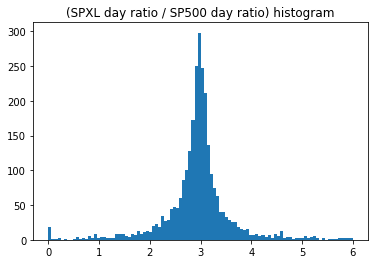

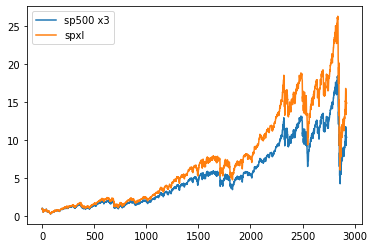

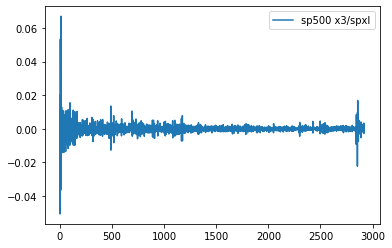

In [6]:
vs_spxl_sp500 = datas['sp500'].query('Date >= "2008-11-06"')
vs_spxl_sp500_plus1 = vs_spxl_sp500['day_ratio'].values+1
rr = spxl.day_ratio.values/(vs_spxl_sp500.day_ratio.values+ 1e-9)
plt.title('(SPXL day ratio / SP500 day ratio) histogram')
_ = plt.hist(rr, bins=100, range=(0,6))
plt.show()

n = 0
N = -1
sp500_ratio_3 = vs_spxl_sp500.day_ratio*3 + 1
cumprod_sp500_ratio_3 = np.cumprod(sp500_ratio_3.values)
t1 = (cumprod_sp500_ratio_3/cumprod_sp500_ratio_3[n])[n:N]
t2 = (spxl['Adj Close'].values/spxl['Adj Close'].iloc[n])[n:N]
plt.plot(t1, label='sp500 x3')
plt.plot(t2, label='spxl')
plt.legend()
plt.show()
plt.plot(np.diff(t1/t2), label='sp500 x3/spxl')
plt.legend()
plt.show()

In [322]:
nasdaq = pd.read_csv("ナスダック100 過去データ.csv")#.loc[:4000]

FileNotFoundError: [Errno 2] File ナスダック100 過去データ.csv does not exist: 'ナスダック100 過去データ.csv'

In [ ]:
nasdaq

In [ ]:
l_rates = nasdaq["前日比%"].apply(lambda x: float(x[:-1])/100)[::-1].values*3 + 1
rates = nasdaq["前日比%"].apply(lambda x: float(x[:-1])/100)[::-1].values + 1
l_rates = np.insert(l_rates, 0, 1)
rates = np.insert(rates, 0, 1)

In [ ]:
def laplace(x, m, v):
    b = (v/2)**0.5
    return np.exp(-abs(x-m)/b)/2/b

In [ ]:
data = rates[1:]
_ = plt.hist(data, bins=100, )
X = np.arange(0.8, 1.15, 0.001)
plt.plot(X, 12*laplace(X, np.mean(data), np.var(data)))

In [ ]:
plt.plot(np.cumprod(rates))
plt.plot(np.cumprod(l_rates))
plt.yscale('log')

In [ ]:
r = np.random.choice(rates, 4000, replace=True)
plt.plot(r)
plt.plot(rates)

In [ ]:
def exe(leverage=3, day_num=100, sp=1):
    arr_list = [[0.8, 1.1, 1.1, 1.04]]
    N = day_num//10
    for _ in range(N):
        r = ((sp**(1/N))**(1/10))+np.random.randn(9)*0.005
        arr_list.append(r)
        arr_list.append([sp**(1/N)/np.prod(r)])
    r = np.concatenate(arr_list)
    np.random.shuffle(r)
    return np.prod(leverage*(r-1)+1)

In [ ]:
exe2_rates = nasdaq["前日比%"].apply(lambda x: float(x[:-1])/100)[::-1].values
def exe2(leverage=3, day_num=100, ):
    r = np.random.choice(exe2_rates, day_num, replace=True)*leverage + 1
    return np.prod(r)

In [ ]:
rates = nasdaq["前日比%"].apply(lambda x: float(x[:-1])/100)[::-1].values + 1
for _  in range(10):
    r = np.random.choice(rates, 365, replace=True)
    plt.plot(r.cumprod())
plt.show()
    
for _  in range(10):
    start = np.random.choice(np.arange(len(rates)-365), 1)[0]
    plt.plot(rates[start:start+365].cumprod())
plt.show()

In [ ]:
D = 1800
rates = nasdaq["前日比%"].apply(lambda x: float(x[:-1])/100)[::-1].values
res1 = []
res2 = []
res3 = []
np.random.seed(100)
for _  in range(10000):
    r = np.random.choice(rates, D, replace=True) + 1
    res1.append(np.prod(r))
    
np.random.seed(100)
for _  in range(10000):
    start = np.random.choice(np.arange(len(rates)-D), 1)[0] 
    res2.append(np.prod(rates[start:start+D]+1))
    
np.random.seed(100)
for _  in range(10000):
    start = np.random.choice(np.arange(len(rates)-D), 1)[0] 
    res3.append(np.prod(rates[start:start+D]*3+1))
    
__ = plt.hist([res2,res3], bins=100)

In [ ]:
D = 365*5
rates = nasdaq["前日比%"].apply(lambda x: float(x[:-1])/100)[::-1].values

def doll_cost(rates):
    cp = np.cumprod(rates)
    r = cp[-1]/cp
    return r.mean()
dres1 = []
dres2 = []
dres3 = []
np.random.seed(100)
for _  in range(10000):
    r = np.random.choice(rates, D, replace=True) + 1
    dres1.append(doll_cost(r))
    
np.random.seed(100)
for _  in range(10000):
    start = np.random.choice(np.arange(len(rates)-D), 1)[0] 
    dres2.append(doll_cost(rates[start:start+D]+1))
    
np.random.seed(100)
for _  in range(10000):
    start = np.random.choice(np.arange(len(rates)-D), 1)[0] 
    dres3.append(doll_cost(rates[start:start+D]*3+1))
    
__ = plt.hist([dres1, dres2, dres3], bins=100)

In [ ]:
_ = plt.hist(dres3, bins=100)

In [ ]:
np.mean(dres3)

In [ ]:
np.sum(np.array(dres3)5)/len(dres3)

In [ ]:
_ = plt.hist([res3, res2], bins=100,density=True)

In [ ]:
np.mean(res3),  np.mean(res2)

In [ ]:
np.sum(np.array(res3)>=1)/len(res3), np.sum(np.array(res2)>=1)/len(res3)

In [ ]:
_ = plt.hist(res3, bins=100)
#_ = plt.hist(res3, bins=100, range=(0, 4))

In [ ]:
_ = plt.hist(res2, bins=100)

In [ ]:
np.sum(np.array(res3)>2)/len(res3), np.sum(np.array(res2)>2)/len(res3)

In [ ]:
np.sum(np.array(res3)<0.1)/len(res3), np.sum(np.array(res2)<0.1)/len(res3)

In [ ]:
for l in [1, 2, 3, 4]:
    res = []
    np.random.seed(100)
    for _ in range(10000):
        res.append(exe2(leverage=l, day_num=3650//2,))
    _ = plt.hist(res, bins=100, density=True)
    ref = 0.1
    print(f"{ref*10}割に下がる確率", np.sum(np.array(res)<ref)/len(res))
    print(np.mean(res), np.std(res))
    plt.show()